In [1]:
#Practicing and completing exercises from kaggle seaborn tutorial

In [2]:
#Importing necessary modules
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
print("Setup Complete")

Setup Complete


In [3]:
#Filter out data of 206 countries and get rank and timeline for 6 countries
country = [[], [], [], [], [], [], []]
#Data file at 'https://www.kaggle.com/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now'
with open(r'input/fifa_ranking.csv','r') as f:
    r = csv.reader(f,delimiter=',')
    for row in r:
        rank = row[0]
        c = row[2]
        date = row[-1]
        if date not in country[0] and date !='rank_date':
            country[0].append(date)
        if c == 'ARG':
            country[1].append(rank)
        elif c=='BRA':
            country[2].append(rank)
        elif c=='ESP':
            country[3].append(rank)
        elif c=='FRA':
            country[4].append(rank)
        elif c=='GER':
            country[5].append(rank)
        elif c=='ITA':
            country[6].append(rank)
        else:
            pass

In [4]:
#create new csv file data of 6 countries
rows = zip(country[0], country[1], country[2], country[3], country[4], country[5], country[6])
with open('fifa.csv', "w") as f:
    writer = csv.writer(f)
    writer.writerow(['Date', 'ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA'])
    for row in rows:
        writer.writerow(row)

In [5]:
#Defining filepath and reading data
fifa_filepath = r'input/fifa.csv'
fifa_data = pd.read_csv(fifa_filepath, index_col='Date', parse_dates=True)


In [6]:
#Checking first 5rows
fifa_data.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5,8,13,12,1,2
1993-09-23,12,1,14,7,5,2
1993-10-22,9,1,7,14,4,3
1993-11-19,9,4,7,15,3,1
1993-12-23,8,3,5,15,1,2


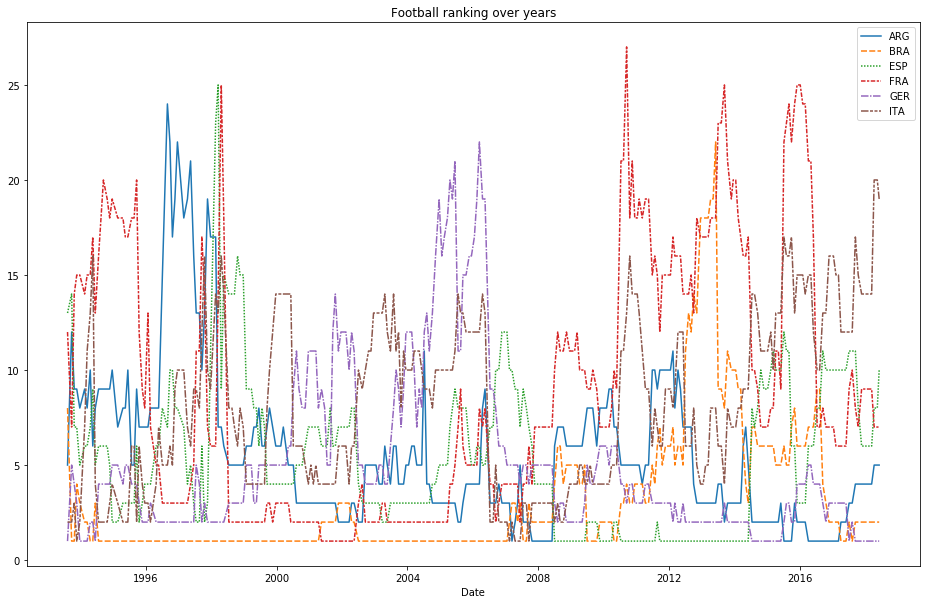

In [7]:
plt.figure(figsize=(16,10)) #SET dimension of plot
plt.title('Football ranking over years')
sns.lineplot(data=fifa_data) #display linechart

Text(0, 0.5, 'Ranking')

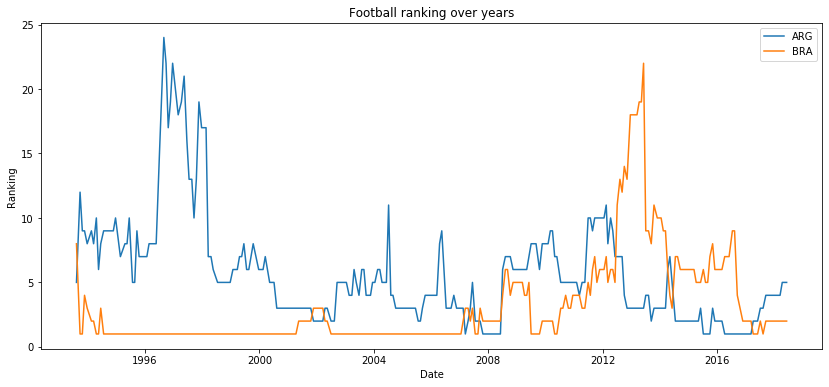

In [8]:
#Plotting individual data
plt.figure(figsize=(14,6))
plt.title('Football ranking over years')
sns.lineplot(data=fifa_data['ARG'], label='ARG')
sns.lineplot(data=fifa_data['BRA'], label='BRA')
plt.xlabel('Date')
plt.ylabel('Ranking')

Text(0, 0.5, 'Ranking')

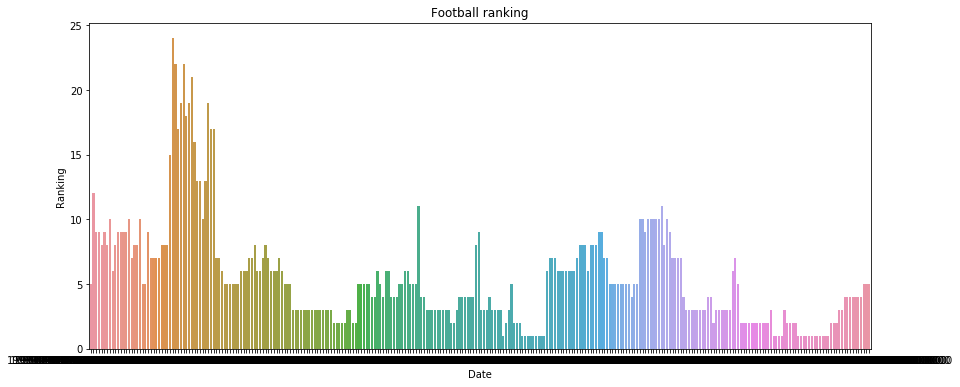

In [9]:
#Bar graph
plt.figure(figsize=(14,6))
plt.title('Football ranking')
sns.barplot(x=fifa_data.index,y=fifa_data['ARG'])
plt.ylabel('Ranking')


Text(104.99999999999999, 0.5, 'Ranking')

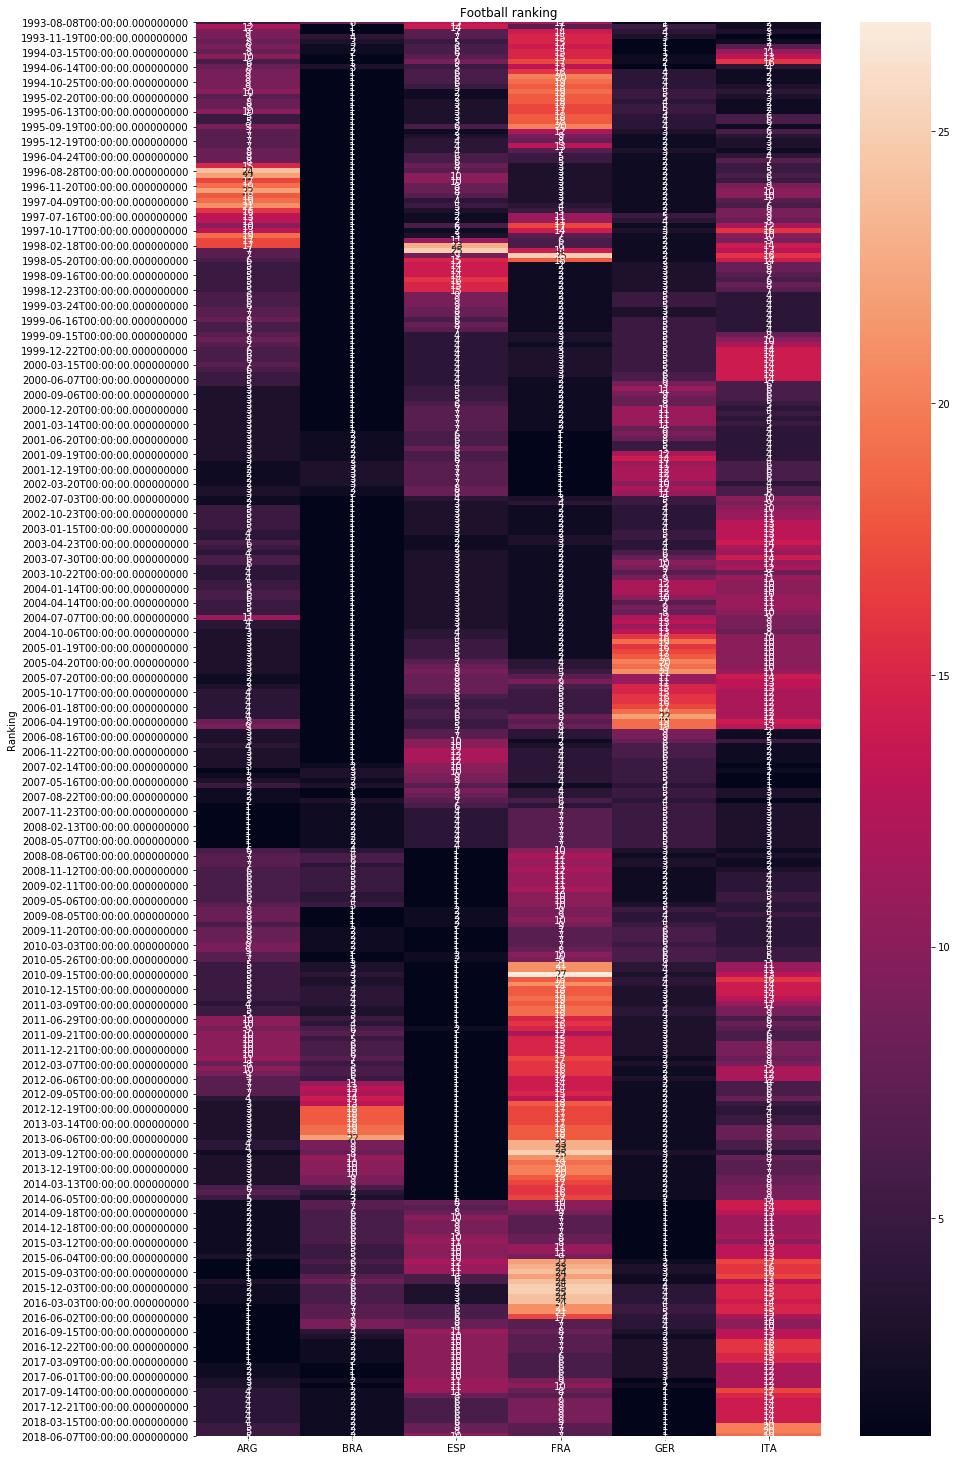

In [10]:
#Heat map
plt.figure(figsize=(14,26))
plt.title('Football ranking')
sns.heatmap(data=fifa_data, annot=True)
plt.ylabel('Ranking')


In [11]:
#Configure and read the csv data
insurance_filepath = r'input/insurance.csv'
insurance_data = pd.read_csv(insurance_filepath)

In [12]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


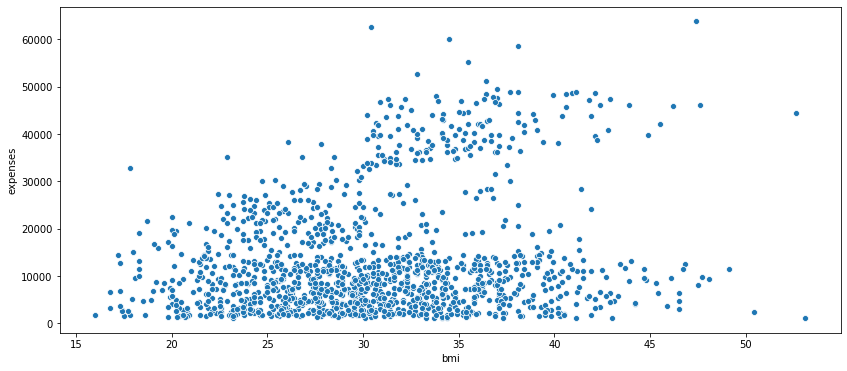

In [13]:
#Scatter plot
plt.figure(figsize=(14,6))
sns.scatterplot(x=insurance_data['bmi'],y=insurance_data['expenses'])

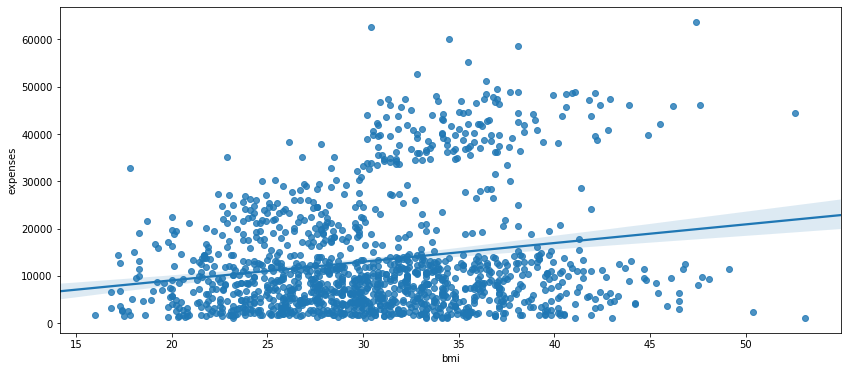

In [14]:
#Regression plot
plt.figure(figsize=(14,6))
sns.regplot(x=insurance_data['bmi'],y=insurance_data['expenses'])

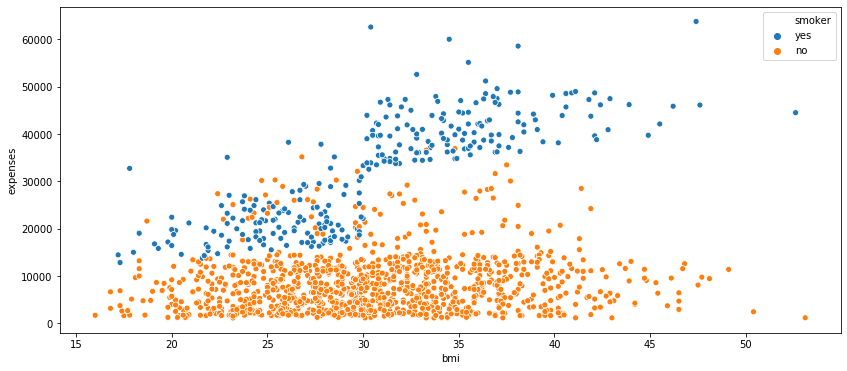

In [15]:
#Color coded scatter plot
plt.figure(figsize=(14,6))
sns.scatterplot(x=insurance_data['bmi'],y=insurance_data['expenses'], hue=insurance_data['smoker'])

<Figure size 1008x432 with 0 Axes>

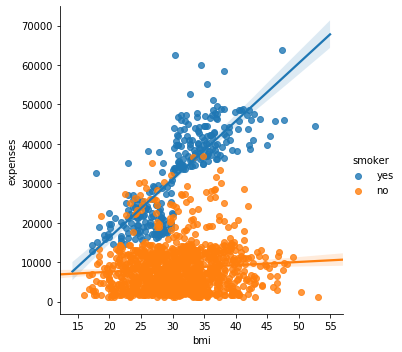

In [16]:
#categorical scatter plot
plt.figure(figsize=(14,6))
sns.lmplot(x='bmi',y='expenses', hue='smoker', data=insurance_data)

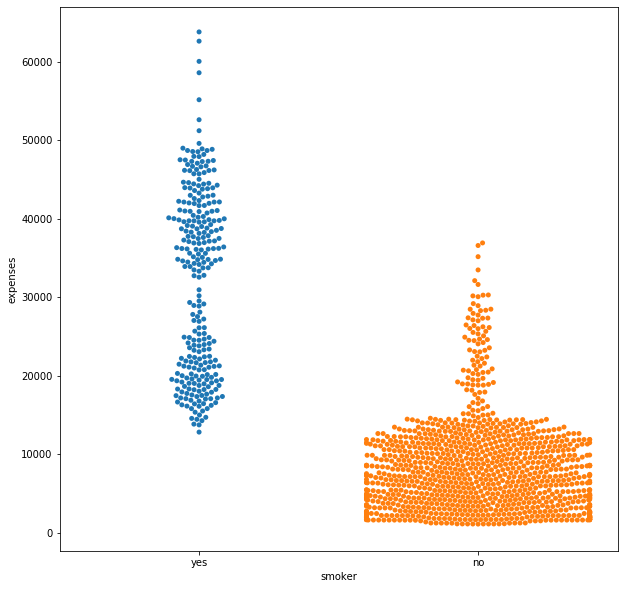

In [17]:
#Categorical swarm plot
plt.figure(figsize=(10,10))
sns.swarmplot(x=insurance_data['smoker'],
             y=insurance_data['expenses'])

In [18]:
iris_filepath = r'input/Iris.csv'
iris_data = pd.read_csv(iris_filepath, index_col='Id')
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


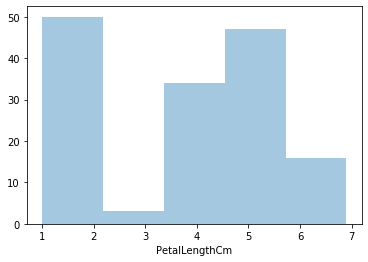

In [19]:
#Histogram
sns.distplot(a=iris_data['PetalLengthCm'], kde=False)

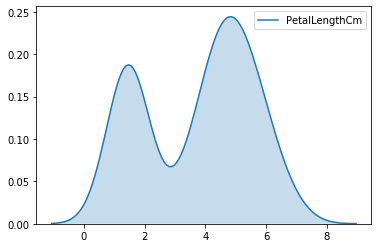

In [20]:
#KDE plot
sns.kdeplot(data=iris_data['PetalLengthCm'], shade=True)

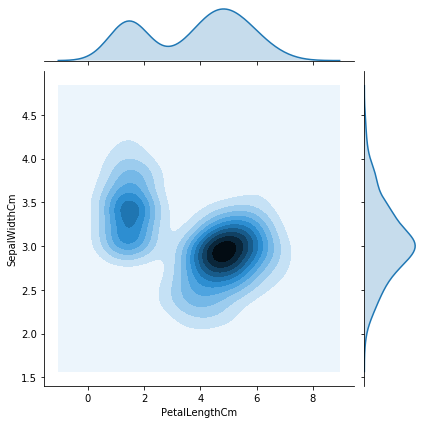

In [21]:
#2D KDE plot
sns.jointplot(x=iris_data['PetalLengthCm'], y=iris_data['SepalWidthCm'], kind='kde')

In [22]:
#
#   Trends - A trend is defined as a pattern of change.
#       sns.lineplot - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.
#   Relationship - There are many different chart types that you can use to understand relationships between variables in your data.
#       sns.barplot - Bar charts are useful for comparing quantities corresponding to different groups.
#       sns.heatmap - Heatmaps can be used to find color-coded patterns in tables of numbers.
#       sns.scatterplot - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
#       sns.regplot - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables.
#       sns.lmplot - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
#       sns.swarmplot - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.
#   Distribution - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
#       sns.distplot - Histograms show the distribution of a single numerical variable.
#       sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
#       sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.

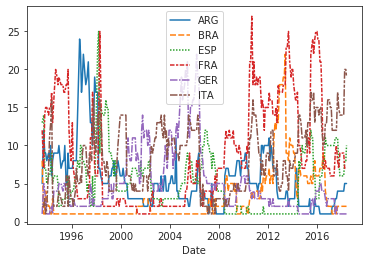

In [23]:
sns.set_style('ticks')#styles:dark/white(grid),ticks
sns.lineplot(data=fifa_data)

In [25]:
#-------------------------END------------------------------------